# K Nearest Neighbors with Python

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [20]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)
print(y_train)

308    1
693    1
267    1
778    0
795    0
926    1
114    1
399    0
717    0
829    0
41     0
912    0
91     1
843    0
867    1
201    1
14     0
107    0
340    0
446    1
435    1
801    0
486    0
336    0
152    1
953    1
125    1
559    0
348    1
312    1
      ..
432    1
335    1
452    0
750    1
722    1
577    1
624    0
554    0
220    0
708    0
830    0
392    0
380    1
941    1
353    1
417    0
26     1
746    1
745    1
740    1
448    0
186    0
157    0
535    1
665    0
509    0
453    1
721    0
515    1
605    0
Name: TARGET CLASS, Length: 700, dtype: int64


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
pred = knn.predict(X_test)
pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], d

## Predictions and Evaluations

Let's evaluate our KNN model!

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(y_test)
print(pred)

print(confusion_matrix(y_test,pred))

409    1
640    1
978    0
767    1
400    1
525    0
510    1
265    0
791    1
472    1
784    0
533    1
738    1
684    0
190    0
92     0
161    0
45     0
306    1
457    1
229    0
680    1
283    1
697    0
800    1
933    1
983    1
825    1
408    1
516    0
      ..
996    0
637    0
565    0
463    0
468    1
60     0
341    1
935    1
256    1
101    0
378    1
768    1
344    1
590    0
633    1
553    1
872    0
264    0
581    0
121    1
945    1
116    0
781    1
277    0
384    0
864    1
607    1
119    0
874    1
35     0
Name: TARGET CLASS, Length: 300, dtype: int64
[1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1

In [37]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.87      0.90       150
          1       0.88      0.94      0.91       150

avg / total       0.91      0.90      0.90       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [39]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

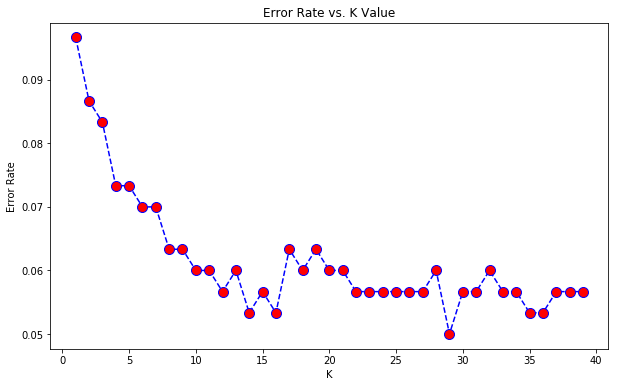

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[130  20]
 [  9 141]]


             precision    recall  f1-score   support

          0       0.94      0.87      0.90       150
          1       0.88      0.94      0.91       150

avg / total       0.91      0.90      0.90       300



In [42]:
# NOW Choose K from Graph with minimum error
k = 29
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K='+str(k))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=29


[[138  12]
 [  3 147]]


             precision    recall  f1-score   support

          0       0.98      0.92      0.95       150
          1       0.92      0.98      0.95       150

avg / total       0.95      0.95      0.95       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!